# Does 2 + 2 = 4?
This notebook is an attempt to quantify the errors of the float sine/cosine functions in `CUDA`, and estimate how they might impact the asbolute accuracy of `WODEN`. They theory for everything is written into `test_calc_measurement_equation.c` in the `testing/cmake_testing/source_components` section of the `WODEN` documentation. We'll be trying to measure the absolute accuracy of the `sine` and `cosine` functions inside ``CUDA``.

## Make $l,m,n$ coords
First up, make some $l,m,n$ coords that add up to known angles, and check every is kosher:

In [1]:
import numpy as np

def find_lmn(phi_simple):
    """Given phi_simple (radians), find a set of l,m,n coords
    that produce phi_simple in the measurement equation"""
    numer = np.sqrt(2)*np.sqrt(-phi_simple**2 + -4*np.pi*phi_simple + 8*np.pi**2) + phi_simple + 2*np.pi
    denom = 6*np.pi

    n = numer / denom

    l = np.sqrt(1 - n*n) / np.sqrt(2)
    m = l

    return l,m,n

##Known list of angles that have predictable sin/cos outputs
phi_simples = [0.0, np.pi/6, np.pi/4, np.pi/3, np.pi/2, 2*np.pi/3, 3*np.pi/4, 5*np.pi/6, np.pi,
                7*np.pi/6, 5*np.pi/4]

##Known sin outputs for input phi_simples
known_sine_angles = [0.0, 0.5, np.sqrt(2)/2, np.sqrt(3)/2, 1.0, np.sqrt(3)/2, np.sqrt(2)/2, 0.5, 0.0,
                     -0.5, -np.sqrt(2)/2]

all_ls = []
all_ms = []
all_ns = []

##For known angles, calculate l,m,n coords and check they are legit
for phi_simple, expec in zip(phi_simples, known_sine_angles):
    l,m,n = find_lmn(phi_simple)
    
    all_ls.append(l)
    all_ms.append(m)
    all_ns.append(n)
    
    phi_outcome = 2*np.pi*(l + m + n - 1)
    
    check_lmn_sum = l*l + m*m + n*n
    
    print(f"Target,Recovered: angle {phi_simple:.6f},{phi_outcome:.6f} sin: {expec:.6f},{np.sin(phi_outcome):.6f}")
    print(f"l,m {l:.6f} n {n:.6f}, sum {check_lmn_sum:.4f}")
    print(f"")



Target,Recovered: angle 0.000000,0.000000 sin: 0.000000,0.000000
l,m 0.000000 n 1.000000, sum 1.0000

Target,Recovered: angle 0.523599,0.523599 sin: 0.500000,0.500000
l,m 0.042574 n 0.998186, sum 1.0000

Target,Recovered: angle 0.785398,0.785398 sin: 0.707107,0.707107
l,m 0.064590 n 0.995819, sum 1.0000

Target,Recovered: angle 1.047198,1.047198 sin: 0.866025,0.866025
l,m 0.087145 n 0.992377, sum 1.0000

Target,Recovered: angle 1.570796,1.570796 sin: 1.000000,1.000000
l,m 0.134070 n 0.981861, sum 1.0000

Target,Recovered: angle 2.094395,2.094395 sin: 0.866025,0.866025
l,m 0.183866 n 0.965602, sum 1.0000

Target,Recovered: angle 2.356194,2.356194 sin: 0.707107,0.707107
l,m 0.210076 n 0.954849, sum 1.0000

Target,Recovered: angle 2.617994,2.617994 sin: 0.500000,0.500000
l,m 0.237340 n 0.941987, sum 1.0000

Target,Recovered: angle 3.141593,3.141593 sin: 0.000000,0.000000
l,m 0.295876 n 0.908248, sum 1.0000

Target,Recovered: angle 3.665191,3.665191 sin: -0.500000,-0.500000
l,m 0.362273 n 

## Check calculation of $b$ is legit
We can give the baseline a length by setting $u = v = w = b$, check the maths of that here works out to still give the expected results

In [2]:
def calc_b(phi_simple, num_mult):
    """Given the target angle `phi_simple` (radians), and
    an integer multiplier `num_mult`, find a baseline
    length `b` that results in the same sine/cosine
    angle"""
    
    if phi_simple == 0:

        b = 2*np.pi*num_mult
        
    else:
        b = (phi_simple + 2*np.pi*num_mult) / phi_simple
        
    return b


##For known angles, calculate l,m,n coords and check they are legit
for phi_simple, expec in zip(phi_simples, known_sine_angles):
    l,m,n = find_lmn(phi_simple)
    
    for num_mult in [1, 10, 100, 1000, 10000]:
        
        b = calc_b(phi_simple, num_mult)
    
        phi_outcome = 2*np.pi*b*(l + m + n - 1)

        print(f"Sine Target,Recovered: angle {expec:.6f},{np.sin(phi_outcome):.6f} b: {b:.1f}")
#         print(f"")

#         if expec == 0:
#             expec_div = 1
#         else:
#             expec_div = expec

#         print((expec - np.sin(phi_outcome)) / expec_div)


Sine Target,Recovered: angle 0.000000,0.000000 b: 6.3
Sine Target,Recovered: angle 0.000000,0.000000 b: 62.8
Sine Target,Recovered: angle 0.000000,0.000000 b: 628.3
Sine Target,Recovered: angle 0.000000,0.000000 b: 6283.2
Sine Target,Recovered: angle 0.000000,0.000000 b: 62831.9
Sine Target,Recovered: angle 0.500000,0.500000 b: 13.0
Sine Target,Recovered: angle 0.500000,0.500000 b: 121.0
Sine Target,Recovered: angle 0.500000,0.500000 b: 1201.0
Sine Target,Recovered: angle 0.500000,0.500000 b: 12001.0
Sine Target,Recovered: angle 0.500000,0.500000 b: 120001.0
Sine Target,Recovered: angle 0.707107,0.707107 b: 9.0
Sine Target,Recovered: angle 0.707107,0.707107 b: 81.0
Sine Target,Recovered: angle 0.707107,0.707107 b: 801.0
Sine Target,Recovered: angle 0.707107,0.707107 b: 8001.0
Sine Target,Recovered: angle 0.707107,0.707107 b: 80001.0
Sine Target,Recovered: angle 0.866025,0.866025 b: 7.0
Sine Target,Recovered: angle 0.866025,0.866025 b: 61.0
Sine Target,Recovered: angle 0.866025,0.866025

## WODEN vs expectation
Ok, I've run the the test in `test_calc_measurement_equation.c`, which outputs a text file of visibilities
calculated

Num pos offsets 67
Num neg offsets 43


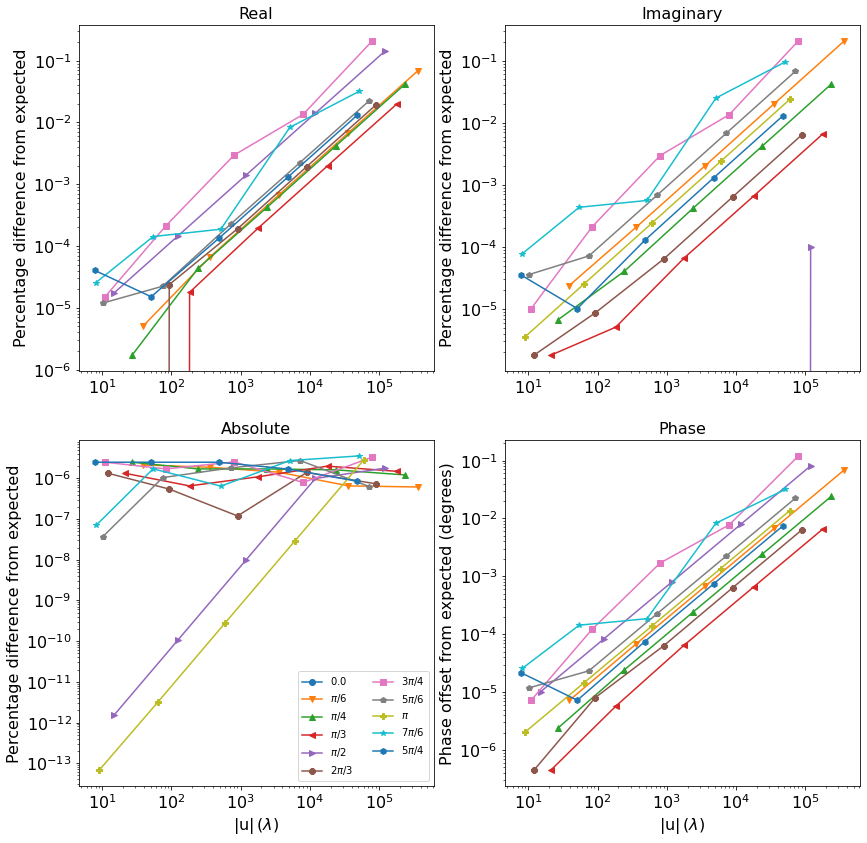

In [3]:
import matplotlib.pyplot as plt
from copy import deepcopy
import matplotlib.ticker as mtick

# data = np.loadtxt('../../build/cmake_testing/source_components/measurement_eq_outcomes.txt')

data = np.load('../../test_installation/absolute_accuracy/accuracy_test_outputs.npz')['all_data']

##Known sin outputs for input phi_simples
known_sine_angles = [0.0, 0.5, np.sqrt(2)/2, np.sqrt(3)/2, 1.0, np.sqrt(3)/2, np.sqrt(2)/2, 0.5, 0.0,
                     -0.5, -np.sqrt(2)/2]

##Known sin outputs for input phi_simples
known_cosine_angles = [1.0, np.sqrt(3)/2, np.sqrt(2)/2, 0.5, 0.0,
                       -0.5, -np.sqrt(2)/2, -np.sqrt(3)/2, -1.0, -np.sqrt(3)/2, -np.sqrt(2)/2]

known_angles_strings = ["$0.0$", "$\pi/6$", "$\pi/4$", "$\pi/3$",
                        "$\pi/2$", "$2\pi/3$", "$3\pi/4$", "$5\pi/6$",
                        "$\pi$",  "$7\pi/6$", "$5\pi/4$"]

num_baselines = 5
num_angles = len(known_sine_angles)

fig, axs  = plt.subplots(2,2, figsize=(14,14))


markers = ["o", "v", "^", "<", ">", "8",
           "s", "p", "P", "*", "h", "H", "+"]

all_re_diffs = np.empty(num_baselines*num_angles)
all_im_diffs = np.empty(num_baselines*num_angles)

num_neg = []
num_pos = []

for angle_ind, known_angle in enumerate(known_angles_strings):

    slice_low = angle_ind*num_baselines
    slice_high = (angle_ind + 1)*num_baselines

    u_lens = data[slice_low:slice_high, 0]
    calc_re = data[slice_low:slice_high, 3]
    calc_im = data[slice_low:slice_high, 4]

    u_lens = np.sqrt(3*u_lens**2)
    
    expec_im = known_sine_angles[angle_ind]
    expec_re = known_cosine_angles[angle_ind]
    
    if expec_re == 0:
        expec_re_div = 1.0
    else:
        expec_re_div = expec_re
        
    if expec_im == 0:
        expec_im_div = 1.0
    else:
        expec_im_div = expec_im

    abs_diff_re = np.abs((expec_re - calc_re) / expec_re_div)*100.0
    abs_diff_im = np.abs((expec_im - calc_im) / expec_im_div)*100.0


    for diff in expec_re - calc_re:
        if diff < 0:
            num_neg.append(diff)
        else:
            num_pos.append(diff)

    for diff in expec_im - calc_im:
        if diff < 0:
            num_neg.append(diff)
        else:
            num_pos.append(diff)

    all_re_diffs[slice_low:slice_high] = abs_diff_re
    all_im_diffs[slice_low:slice_high] = abs_diff_im

    axs[0,0].plot(u_lens, abs_diff_re, color=f'C{angle_ind}',
                marker=markers[angle_ind], label=known_angle)
    axs[0,1].plot(u_lens, abs_diff_im, color=f'C{angle_ind}',
                marker=markers[angle_ind], label=known_angle)

    expec_comp = expec_re + 1j*expec_im
    calc_comp = calc_re + 1j*calc_im

    abs_diff_percent = np.abs(1 - np.abs(calc_comp))*100

    phase_expec = np.angle(expec_comp)
    phase_calc = np.angle(calc_comp)

    phase_diff = np.abs(phase_expec - phase_calc)

    axs[1,0].plot(u_lens, abs_diff_percent, color=f'C{angle_ind}',
                marker=markers[angle_ind], label=known_angle)
    axs[1,1].plot(u_lens, phase_diff*(180.0/np.pi), color=f'C{angle_ind}',
                marker=markers[angle_ind], label=known_angle)

    # print(np.abs(expec_comp))

print(f"Num pos offsets {len(num_pos)}")
print(f"Num neg offsets {len(num_neg)}")

fontsize = 16

for ax in axs.flatten():

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', labelsize=fontsize)

axs[1,0].legend(ncol=2)


axs[1,0].set_xlabel('$|\mathrm{u}| \,(\lambda)$', fontsize=fontsize)
axs[1,1].set_xlabel('$|\mathrm{u}| \,(\lambda)$', fontsize=fontsize)

axs[0,0].set_ylabel('Percentage difference from expected', fontsize=fontsize)
axs[0,1].set_ylabel('Percentage difference from expected', fontsize=fontsize)
axs[1,0].set_ylabel('Percentage difference from expected', fontsize=fontsize)
axs[1,1].set_ylabel('Phase offset from expected (degrees)', fontsize=fontsize)


axs[0,0].set_title("Real", fontsize=fontsize)
axs[0,1].set_title("Imaginary", fontsize=fontsize)
axs[1,0].set_title("Absolute", fontsize=fontsize)
axs[1,1].set_title("Phase", fontsize=fontsize)

plt.show()

Real intercept -5.81135 slope 0.89464
Imag intercept -5.73264 slope 0.84455


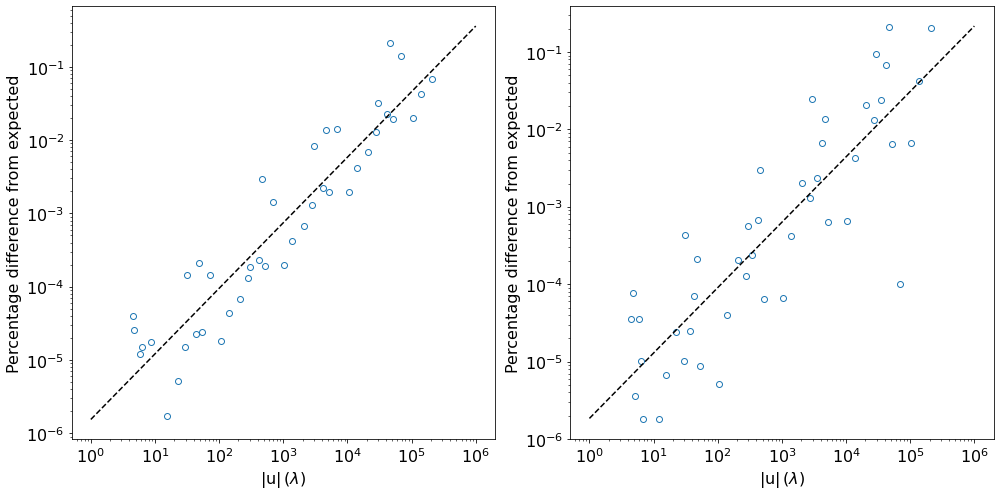

In [4]:
from lmfit.models import PowerLawModel,LinearModel

u_lens = data[:,0]

u_range = np.arange(1,1e6)

linear_model = LinearModel(prefix='linear_')
linear_params = linear_model.make_params()

fit_re = linear_model.fit(np.log10(all_re_diffs[all_re_diffs != 0]), linear_params, x=np.log10(u_lens[all_re_diffs != 0]))
intercept_re = fit_re.params['linear_intercept'].value
slope_re = fit_re.params['linear_slope'].value
print(f'Real intercept {intercept_re:.5f} slope {slope_re:.5f}')

best_fit_re = 10**(intercept_re + np.log10(u_range)*slope_re)


fig, axs  = plt.subplots(1,2, figsize=(14,7))

axs[0].plot(u_lens, all_re_diffs, 'o', mfc='none')
axs[0].plot(u_range, best_fit_re, 'k--')


fit_im = linear_model.fit(np.log10(all_im_diffs[all_im_diffs != 0]), linear_params, x=np.log10(u_lens[all_im_diffs != 0]))
intercept_im = fit_im.params['linear_intercept'].value
slope_im = fit_im.params['linear_slope'].value
print(f'Imag intercept {intercept_im:.5f} slope {slope_im:.5f}')

best_fit_im = 10**(intercept_im + np.log10(u_range)*slope_im)

axs[1].plot(u_lens, all_im_diffs, 'o', mfc='none')
axs[1].plot(u_range, best_fit_im, 'k--')

for ax in axs:
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_xlabel('$|\mathrm{u}| \,(\lambda)$', fontsize=fontsize)
    ax.set_ylabel('Percentage difference from expected', fontsize=fontsize)
    
    ax.tick_params(axis='both', labelsize=fontsize)


plt.tight_layout()
# fig.savefig('measure_eq_results.png',bbox_inches='tight')
plt.show()

intercept = (intercept_im + intercept_re) / 2
slope = (slope_im + slope_re) / 2

# How do these errors manifest?

Ok, now we have a functional form for the percentage offset, we can make "true" visibilities, and then add this baseline length-dependent error, and see how that effects something like calibration. I had to code up the `YANDAsoft` calibration algorithm for my Shapelet paper, so copy across some functions here to run a calibration.

## Calibration functions

I'm going to set the number of antennas/baselines to the MWA because I like the MWA.

In [5]:
##Some lovely hard coding
NUM_ANTENNAS = 128
NUM_BASELINES = 8128

np.random.seed(983745)

D2R = np.pi/180.0

MWA_LAT = -26.7*D2R

def get_uvw(x_length=None, y_length=None, z_length=None,
            dec=MWA_LAT, ha=0.0):
    '''Takes the baseline length in X,Y,Z (wavelengths) and calculates the u,v,w
    for MWA zenith'''

    X = x_length
    Y = y_length
    Z = z_length

    u = np.sin(ha)*X + np.cos(ha)*Y
    v = -np.sin(dec)*np.cos(ha)*X + np.sin(dec)*np.sin(ha)*Y + np.cos(dec)*Z
    w = np.cos(dec)*np.cos(ha)*X - np.cos(dec)*np.sin(ha)*Y + np.sin(dec)*Z

    return u,v,w

def enh2uvw(east, north, height, model_num, latitiude=MWA_LAT):
    """Takes an array layout in e,n,h and returns the u,v,w
    for a zenith phase centre at given latitude"""
    sl = np.sin(latitiude)
    cl = np.cos(latitiude)
    X = -north*sl + height*cl
    Y = east
    Z = north*cl + height*sl

    all_us = []
    all_vs = []
    all_ws = []

    for ant1 in np.arange(NUM_ANTENNAS - 1):
        for ant2 in np.arange(ant1 + 1, NUM_ANTENNAS):

            x_diff = X[ant1] - X[ant2]
            y_diff = Y[ant1] - Y[ant2]
            z_diff = Z[ant1] - Z[ant2]

            u,v,w = get_uvw(x_length=x_diff, y_length=y_diff, z_length=z_diff)

            all_us.append(u)
            all_vs.append(v)
            all_ws.append(w)

    return np.array(all_us), np.array(all_vs), np.array(all_ws)

def apply_gains(model, gains):
    '''Takes model visibilities and gains and applies (multiples by) the gains to the model'''
    updated_model = []
    model_ind = 0
    for i in np.arange(len(gains)-1):
        for j in range(i+1,len(gains)):
            updated_model.append(gains[i]*model[model_ind]*np.conjugate(gains[j]))
            model_ind += 1
    return np.array(updated_model)

def minimise_using_a(visi_data, gains, model):
    '''Takes in visibility data, current gain estimates and a sky model.
    Using this it creates an 'A' np.array to estimate updates to the current gains.
    Returns updated gains'''

    ##Generate and populate the 'A' np.array
    visi_ind = 0
    ##Set up empty np.array
    a_array = np.zeros((2*len(visi_data),2*len(gains)))
    for i in range(len(gains)-1):
        for j in range(i+1,len(gains)):
            a_array[2*visi_ind,2*i] = np.real(visi_data[visi_ind]*np.conjugate(gains[j]))
            a_array[2*visi_ind,2*i+1] = -np.imag(visi_data[visi_ind]*np.conjugate(gains[j]))
            a_array[2*visi_ind,2*j] = np.real(visi_data[visi_ind]*gains[i])
            a_array[2*visi_ind,2*j+1] = np.imag(visi_data[visi_ind]*gains[i])

            ##Imag part goes in first row
            a_array[2*visi_ind+1,2*i] = np.imag(visi_data[visi_ind]*np.conjugate(gains[j]))
            a_array[2*visi_ind+1,2*i+1] = np.real(visi_data[visi_ind]*np.conjugate(gains[j]))
            a_array[2*visi_ind+1,2*j] = np.imag(visi_data[visi_ind]*gains[i])
            a_array[2*visi_ind+1,2*j+1] = -np.real(visi_data[visi_ind]*gains[i])
            visi_ind += 1
    a_array = np.matrix(a_array)

    ##Start by giving everything a weight of 1.0
    ##via an identity matrix
    weights = np.identity(a_array.shape[0])

    ##Find the difference between the real visis and the model
    ##with the gains applied
    diffs = visi_data - apply_gains(model,gains)

    ##Populate a difference np.array with real and imag parts of the
    ##the difference between
    diff_array = np.zeros((2*len(visi_data),1))
    for i in np.arange(len(diffs)):
        diff_array[2*i] = np.real(diffs[i])
        diff_array[2*i+1] = np.imag(diffs[i])

    ##The equation used to calucalte the update to the gains is
    ##x_tilde = inverse(transpose(a_np.array)*weights*a_np.array) * transpose(a_np.array) * weights * diff_np.array
    x_tilde = np.linalg.pinv((np.transpose(a_array)*weights)*a_array) * np.transpose(a_array) * weights * diff_array

    ##Put the updates that we found back into complex form so that we can easily apply to the gains
    delta_gains = np.zeros(len(gains),dtype=complex)
    for i in np.arange(len(delta_gains)):
        delta_gains[i] = complex(x_tilde[2*i],x_tilde[2*i+1])

    ##TODO Add in a safe-guard against massive updates to avoid death of matrix?
    ##Choose how much of the updates to apply to the gains
    update_step_size = 0.5

    return gains + update_step_size*delta_gains

def get_gain(data=None, model=None, num_iterations=10):
    '''Loops over all time steps, and runs a 10 iteration calibration'''

    ##Initial gains guess of one as we know we have simulations
    gains = np.ones(128,dtype=complex)

    for iter in range(num_iterations):
        gains = minimise_using_a(data, gains, model)

        # print(f"On iter {iter} in calibration")

    return gains

## Making array layouts and models
I'm going to make random array layouts, and make visibilities with random tile gain errors. The test will be how well the calibration is able to recover the correct gain for each tile. I'll make two sets of model visibilities to calibrate with. One I'll apply the gains to, and use that as the data to be calibrated. Another, I'll add this baseline-dependent error to, and use that as a model to calibrate to. Below, I'll set up functions to acheive that.

In [6]:
from copy import deepcopy

def make_array(model_num, east_max=1000, north_max=1000, height_max=5):
    """Makes a random array between given east, north, and height limits.
    Returns the u,v,w coords for a zenith phase centre for the array.
    Plots the east,north and resultant u,v"""
    east = np.random.uniform(-east_max, east_max, NUM_ANTENNAS)
    north = np.random.uniform(-north_max, north_max, NUM_ANTENNAS)
    height = np.random.uniform(-height_max, height_max, NUM_ANTENNAS)

    us, vs, ws = enh2uvw(east, north, height, model_num)
    
    fig, axs = plt.subplots(1,2, figsize=(10,6))

    axs[0].plot(east, north, 'C0o', mfc='none')

    axs[1].plot(us, vs, 'C0.', mfc='none')

    axs[0].set_xlabel('East (wavelengths)')
    axs[0].set_ylabel('North (wavelengths)')

    axs[1].set_xlabel('$u$ (wavelengths)')
    axs[1].set_ylabel('$v$ (wavelengths)')

    plt.tight_layout()
#     fig.savefig(f'plots/array_layout_{model_num:03d}.png',bbox_inches='tight')
    plt.show()

    return us, vs, ws

def make_gains(phase_err=10, gain_err=0.05):
    """Makes a set of complex gains which have a random uniform
    gain error between +/- 5% and a phase error +/- 10 deg"""

    phases = np.random.uniform(-phase_err*(np.pi/180.0), phase_err*(np.pi/180.0), NUM_ANTENNAS)
    gains = 1 + np.random.uniform(-gain_err, gain_err, NUM_ANTENNAS)

    gains = gains*np.exp(1j*phases)

    ##First gain is reference gain
    gains[0] = 1.0 + 0.0j

    return gains

print(f"Using slope {slope:.3f} intercept {intercept:.3f}")

def simple_simulate(us, vs, ws, l, m, n, gains):
    """Using the given u,v,w coords, l,m,n coord, and set of gains,
    create a 'true' set of visibilities without any errors, and
    an 'error' set of visibilities, where we add a """

    ##The measurement equation
    model = np.exp(2j*np.pi*(us*l + vs*m + ws*(n-1)))

    ##Apply the gains to the 'perfect' visibilities
    true_visis = apply_gains(model, gains)

    ##Lengths of the baselines
    u_lengths = np.sqrt(us*us + vs*vs + ws*ws)
    

    ##Get the fractional error based on length of baseline
    ##using the linear fit we made in log space
    errors_frac = 10**(np.log10(u_lengths)*slope + intercept)

    ##About half the errors are negative, half are positive. Make an array
    ##of half pos, half neg, and apply to fractional errors

    signs = np.random.uniform(0.0, 1.0, NUM_BASELINES)

    signs[signs < 0.5] = -1.0
    signs[signs >= 0.5] = 1.0

    ##Set the franctional errors as half neg/half pos
    errors_frac *= signs

    ##Make a copy of the model
    err_model = deepcopy(model)
    
    ##Add fractional errors onto the error models
    err_model += errors_frac*err_model
    
    ##Apply the true gains to the 'error' model
    err_visis = apply_gains(err_model, gains)

    return true_visis, gains, model, err_visis, err_model, u_lengths

Using slope 0.870 intercept -5.772


For this experiment, I'll try 5 different random array layouts, and generate 25 different sets of visibilities for each array layout, with each visibility having a single point source in a different direction on the sky. I'll run two calibrations for each simulation, one with a "true" model, and one with errors injected.

Doing model 0---------------------------------


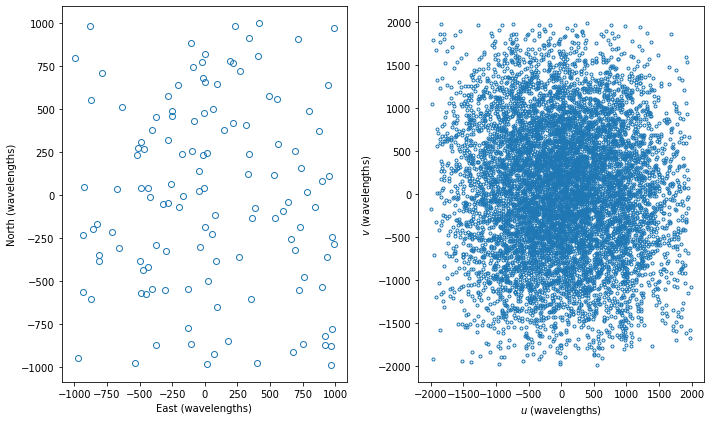

Doing coord -0.7,-0.7
Doing coord -0.7,-0.3
Doing coord -0.7,0.0
Doing coord -0.7,0.3
Doing coord -0.7,0.7
Doing coord -0.3,-0.7
Doing coord -0.3,-0.3
Doing coord -0.3,0.0
Doing coord -0.3,0.3
Doing coord -0.3,0.7
Doing coord 0.0,-0.7
Doing coord 0.0,-0.3
Doing coord 0.0,0.0
Doing coord 0.0,0.3
Doing coord 0.0,0.7
Doing coord 0.3,-0.7
Doing coord 0.3,-0.3
Doing coord 0.3,0.0
Doing coord 0.3,0.3
Doing coord 0.3,0.7
Doing coord 0.7,-0.7
Doing coord 0.7,-0.3
Doing coord 0.7,0.0
Doing coord 0.7,0.3
Doing coord 0.7,0.7
Doing model 1---------------------------------


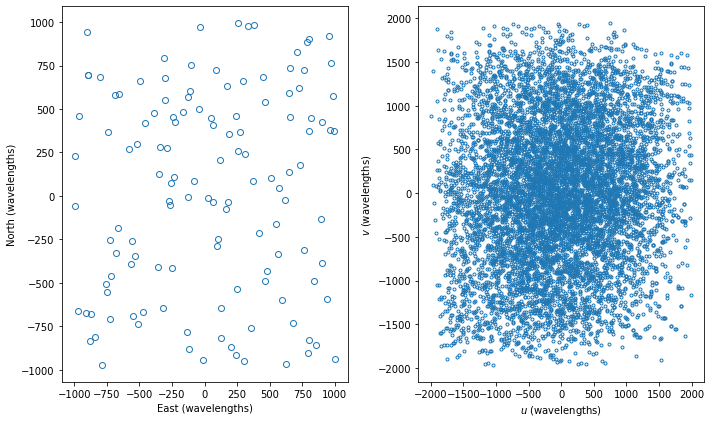

Doing coord -0.7,-0.7
Doing coord -0.7,-0.3
Doing coord -0.7,0.0
Doing coord -0.7,0.3
Doing coord -0.7,0.7
Doing coord -0.3,-0.7
Doing coord -0.3,-0.3
Doing coord -0.3,0.0
Doing coord -0.3,0.3
Doing coord -0.3,0.7
Doing coord 0.0,-0.7
Doing coord 0.0,-0.3
Doing coord 0.0,0.0
Doing coord 0.0,0.3
Doing coord 0.0,0.7
Doing coord 0.3,-0.7
Doing coord 0.3,-0.3
Doing coord 0.3,0.0
Doing coord 0.3,0.3
Doing coord 0.3,0.7
Doing coord 0.7,-0.7
Doing coord 0.7,-0.3
Doing coord 0.7,0.0
Doing coord 0.7,0.3
Doing coord 0.7,0.7
Doing model 2---------------------------------


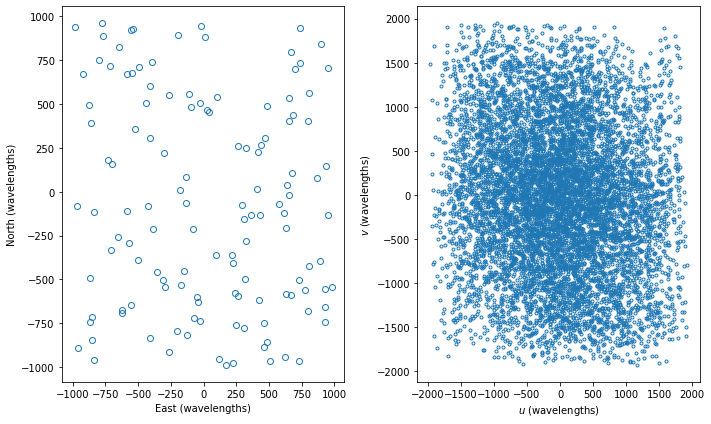

Doing coord -0.7,-0.7
Doing coord -0.7,-0.3
Doing coord -0.7,0.0
Doing coord -0.7,0.3
Doing coord -0.7,0.7
Doing coord -0.3,-0.7
Doing coord -0.3,-0.3
Doing coord -0.3,0.0
Doing coord -0.3,0.3
Doing coord -0.3,0.7
Doing coord 0.0,-0.7
Doing coord 0.0,-0.3
Doing coord 0.0,0.0
Doing coord 0.0,0.3
Doing coord 0.0,0.7
Doing coord 0.3,-0.7
Doing coord 0.3,-0.3
Doing coord 0.3,0.0
Doing coord 0.3,0.3
Doing coord 0.3,0.7
Doing coord 0.7,-0.7
Doing coord 0.7,-0.3
Doing coord 0.7,0.0
Doing coord 0.7,0.3
Doing coord 0.7,0.7
Doing model 3---------------------------------


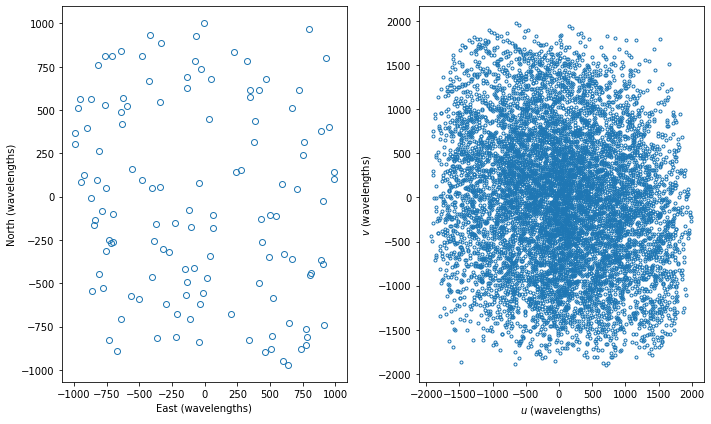

Doing coord -0.7,-0.7
Doing coord -0.7,-0.3
Doing coord -0.7,0.0
Doing coord -0.7,0.3
Doing coord -0.7,0.7
Doing coord -0.3,-0.7
Doing coord -0.3,-0.3
Doing coord -0.3,0.0
Doing coord -0.3,0.3
Doing coord -0.3,0.7
Doing coord 0.0,-0.7
Doing coord 0.0,-0.3
Doing coord 0.0,0.0
Doing coord 0.0,0.3
Doing coord 0.0,0.7
Doing coord 0.3,-0.7
Doing coord 0.3,-0.3
Doing coord 0.3,0.0
Doing coord 0.3,0.3
Doing coord 0.3,0.7
Doing coord 0.7,-0.7
Doing coord 0.7,-0.3
Doing coord 0.7,0.0
Doing coord 0.7,0.3
Doing coord 0.7,0.7
Doing model 4---------------------------------


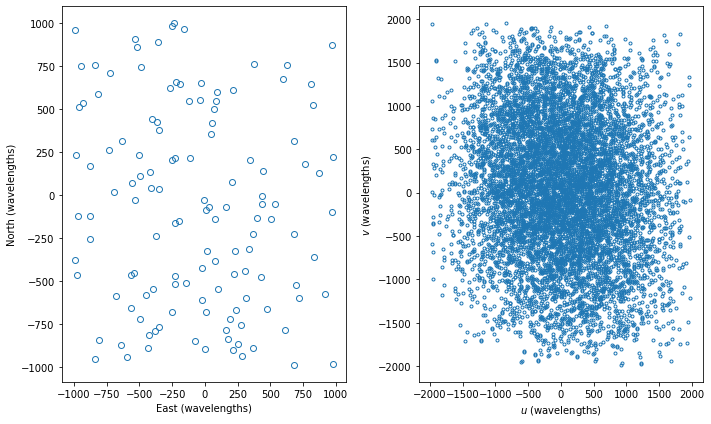

Doing coord -0.7,-0.7
Doing coord -0.7,-0.3
Doing coord -0.7,0.0
Doing coord -0.7,0.3
Doing coord -0.7,0.7
Doing coord -0.3,-0.7
Doing coord -0.3,-0.3
Doing coord -0.3,0.0
Doing coord -0.3,0.3
Doing coord -0.3,0.7
Doing coord 0.0,-0.7
Doing coord 0.0,-0.3
Doing coord 0.0,0.0
Doing coord 0.0,0.3
Doing coord 0.0,0.7
Doing coord 0.3,-0.7
Doing coord 0.3,-0.3
Doing coord 0.3,0.0
Doing coord 0.3,0.3
Doing coord 0.3,0.7
Doing coord 0.7,-0.7
Doing coord 0.7,-0.3
Doing coord 0.7,0.0
Doing coord 0.7,0.3
Doing coord 0.7,0.7


In [7]:
do_cal = True

number_models = 5
num_iterations = 20

ls = np.array([-0.7, -0.3, 0.0, 0.3, 0.7])
ms = np.array([-0.7, -0.3, 0.0, 0.3, 0.7])

if do_cal:

    all_results = np.empty((number_models*len(ls)*len(ms), NUM_ANTENNAS, 3), dtype=complex)

    for model_num in range(number_models):
        print(f'Doing model {model_num}---------------------------------')

        us, vs, ws = make_array(model_num)
        gains = make_gains()

        for l_ind, l in enumerate(ls):
            for m_ind, m in enumerate(ms):
                print(f'Doing coord {l:.1f},{m:.1f}')

                result = model_num*len(ls)*len(ms) + l_ind*len(ms) + m_ind

                ##Find n based on l,m
                n = np.sqrt(1 - l*l - m*m)

                true_visis, true_gains, true_model, err_visis, err_model, u_lengths = simple_simulate(us, vs, ws, l, m, n, gains)

                recover_true_gains = get_gain(data=true_visis, model=true_model, num_iterations=num_iterations)
                recover_error_gains = get_gain(data=true_visis, model=err_model, num_iterations=num_iterations)

                results = np.empty((len(true_gains), 3), dtype=complex)

                results[:,0] = true_gains
                results[:,1] = recover_true_gains
                results[:,2] = recover_error_gains

                all_results[result] = results

    np.savez_compressed("notebook_gain_error_from_cal_test.npz", results=all_results)


# Calibration results
I now have 625 calibration runs. Let's start off by just plotting a histogram of all the offsets from the correct gain and phase, for both the "true" and "error" models, for each calibration run. As we go, we'll collect the median and median absolute deviation of the offests from expectation for future plottage.

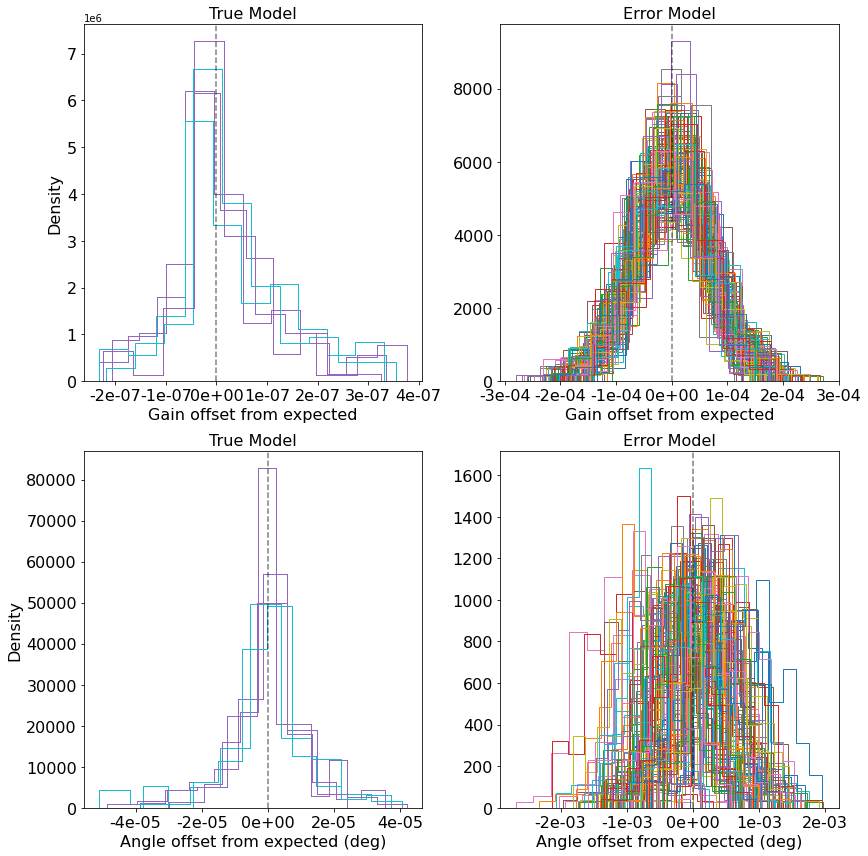

In [8]:
from scipy.stats import median_abs_deviation as mad
import matplotlib.ticker as ticker

def plot_gain_results(results, axs):
    """Given a set of calibration results, plot the outcomes
    on the given set of axes, and collect some mad/med stats"""

    ##Slice relevant data
    true_gains = results[:,0]
    recover_true_gains = results[:,1]
    recover_error_gains = results[:,2]

    ##Find the absolute gain offset
    gain_offset_true = ((np.abs(recover_true_gains) - np.abs(true_gains)))
    gain_offset_error = ((np.abs(recover_error_gains) - np.abs(true_gains)))

    ##Plot histogram of gains offsets
    axs[0,0].hist(gain_offset_true, histtype='step', density=True, lw=1.0) 
    axs[0,1].hist(gain_offset_error, histtype='step', density=True, lw=1.0)

    ##Find the phases of the two calibrations in reference to the first tile
    phases_true_recover = np.angle(recover_true_gains) - np.angle(recover_true_gains[0])
    phases_error_recover = np.angle(recover_error_gains) - np.angle(recover_error_gains[0])

    ##Find the phase offset from the true gain phase
    phase_offset_true = np.angle(true_gains)/D2R - phases_true_recover/D2R
    phase_offset_error = np.angle(true_gains)/D2R - phases_error_recover/D2R

    ##Plot the phase offset histograms
    axs[1,0].hist(phase_offset_true, histtype='step', density=True, lw=1.0)
    axs[1,1].hist(phase_offset_error,histtype='step', density=True, lw=1.0)
    
    ##Find the median and median absolute deviation for
    ##the gain and phase of both the true and error models
    med_gain_true = np.median(gain_offset_true)
    mad_gain_true = mad(gain_offset_true)
    med_gain_error = np.median(gain_offset_error)
    mad_gain_error = mad(gain_offset_error)

    med_phase_true = np.median(phase_offset_true)
    mad_phase_true = mad(phase_offset_true)
    med_phase_error = np.median(phase_offset_error)
    mad_phase_error = mad(phase_offset_error)
    
#     print(gain_offset_error.min(), gain_offset_error.max(), mad_gain_error)

    return med_gain_true, mad_gain_true, med_gain_error, mad_gain_error, med_phase_true, mad_phase_true, med_phase_error, mad_phase_error

##Load up the calibration results
# results = np.load("gain_error_from_cal_test.npz")["results"]
results = np.load("notebook_gain_error_from_cal_test.npz")["results"]


fig, axs = plt.subplots(2,2, figsize=(12, 12))

##make empty lists and just stick results in because I'm being lazy
all_med_gain_true = []
all_mad_gain_true = []
all_med_gain_error = []
all_mad_gain_error = []

all_med_phase_true = []
all_mad_phase_true = []
all_med_phase_error = []
all_mad_phase_error = []

## For each calibration run, plot some histograms and collect some stats
for result in range(number_models*len(ls)*len(ms)):
# for result in range(5):

    med_gain_true, mad_gain_true, med_gain_error, mad_gain_error, med_phase_true, mad_phase_true, med_phase_error, mad_phase_error = plot_gain_results(results[result, :, :], axs)

    all_med_gain_true.append(med_gain_true)
    all_mad_gain_true.append(mad_gain_true)
    all_med_gain_error.append(med_gain_error)
    all_mad_gain_error.append(mad_gain_error)
    
    all_med_phase_true.append(med_phase_true)
    all_mad_phase_true.append(mad_phase_true)
    all_med_phase_error.append(med_phase_error)
    all_mad_phase_error.append(mad_phase_error)
    
for ax in axs.flatten():
    ax.tick_params(axis='both', labelsize=fontsize)
#     ax.ticklabel_format(useOffset=False)

    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))
    
axs[0,0].set_title("True Model", fontsize=fontsize)
axs[0,1].set_title("Error Model", fontsize=fontsize)

axs[1,0].set_title("True Model", fontsize=fontsize)
axs[1,1].set_title("Error Model", fontsize=fontsize)

axs[0,0].set_ylabel('Density', fontsize=fontsize)
axs[1,0].set_ylabel('Density', fontsize=fontsize)

axs[0,0].set_xlabel('Gain offset from expected', fontsize=fontsize)
axs[0,1].set_xlabel('Gain offset from expected', fontsize=fontsize)

axs[1,0].set_xlabel('Angle offset from expected (deg)', fontsize=fontsize)
axs[1,1].set_xlabel('Angle offset from expected (deg)', fontsize=fontsize)

for ax in axs.flatten():
    ax.axvline(0.0, linestyle='--',alpha=0.5, color='k')

plt.tight_layout()
# fig.savefig('hist_gain-phase_error_from_cal_test.png',bbox_inches='tight')
plt.show()

Ok, so there is definitely an increase in the error seen in both gain and phase, and importantly, the distribution of phase offsets looks different for the error model. Let look at the median and median offset for each calibration:

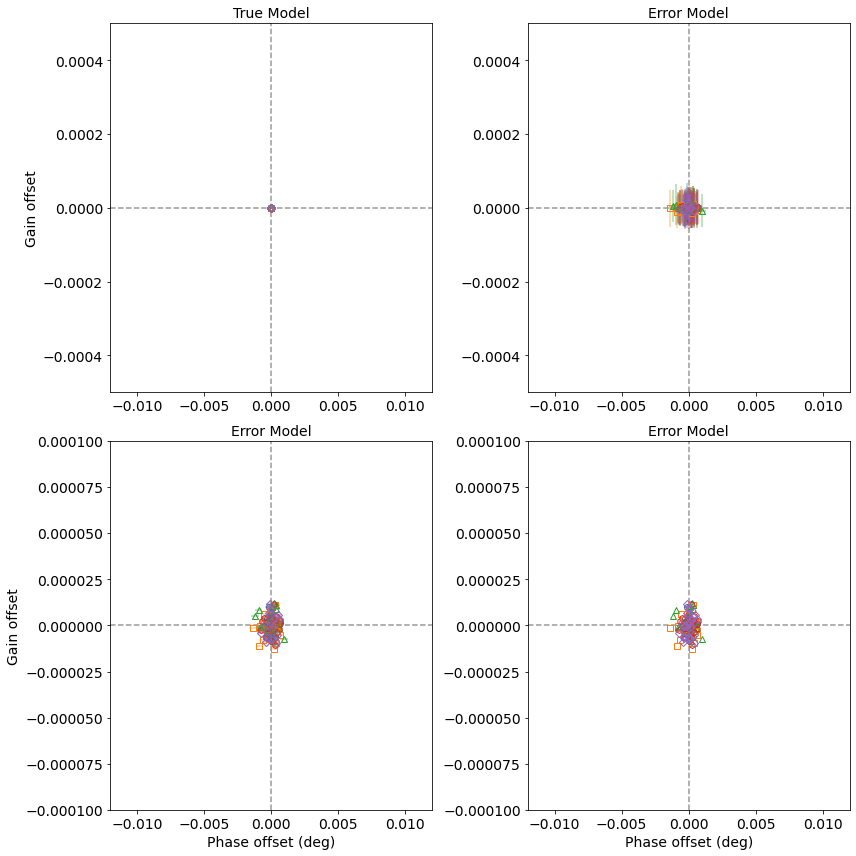

Median magnitude of median phase offset: 2.9e-04 +/- 1.5e-04


In [9]:
fig, axs = plt.subplots(2,2, figsize=(12, 12))

num_coords = len(ls)*len(ms)
markers = ['o', 's', '^', 'h', 'D']

for ind in range(len(all_med_phase_true)):

    m_ind = int(ind // num_coords)

    axs[0,0].errorbar(all_med_phase_true[ind], all_med_gain_true[ind],
                    xerr=all_mad_phase_true[ind], yerr=all_mad_gain_true[ind],
                    marker=markers[m_ind], mfc='none')


    axs[0,1].errorbar(all_med_phase_error[ind], all_med_gain_error[ind],
                    xerr=all_mad_phase_error[ind], yerr=all_mad_gain_error[ind],
                    marker=markers[m_ind], mfc='none',alpha=0.4,
                    mec=f"C{m_ind}", ecolor=f"C{m_ind}")
    axs[0,1].plot(all_med_phase_error[ind], all_med_gain_error[ind],
                    marker=markers[m_ind], mfc='none',
                    color=f"C{m_ind}")

    axs[1,0].errorbar(all_med_phase_error[ind], all_med_gain_error[ind],
                    xerr=all_mad_phase_error[ind],
                    marker=markers[m_ind], mfc='none',alpha=0.4,
                    mec=f"C{m_ind}", ecolor=f"C{m_ind}")
    axs[1,0].plot(all_med_phase_error[ind], all_med_gain_error[ind],
                    marker=markers[m_ind], mfc='none',
                    color=f"C{m_ind}")

    axs[1,1].plot(all_med_phase_error[ind], all_med_gain_error[ind],
                    marker=markers[m_ind], mfc='none',
                    color=f"C{m_ind}")

fontsize = 14
    
axs[0,0].set_ylabel('Gain offset', fontsize=fontsize)
axs[1,0].set_ylabel('Gain offset', fontsize=fontsize)

axs[0,0].set_title('True Model', fontsize=fontsize)
axs[0,1].set_title('Error Model', fontsize=fontsize)
axs[1,0].set_title('Error Model', fontsize=fontsize)
axs[1,1].set_title('Error Model', fontsize=fontsize)

axs[1,0].set_xlabel('Phase offset (deg)', fontsize=fontsize)
axs[1,1].set_xlabel('Phase offset (deg)', fontsize=fontsize)

for ax in axs.flatten():

    ax.set_xlim(-0.012, 0.012)
    ax.set_ylim(-5e-4, 5e-4)

    ax.axvline(0., color='k', linestyle='--', alpha=0.4, zorder=0)
    ax.axhline(0., color='k', linestyle='--', alpha=0.4, zorder=0)
    ax.tick_params(axis='both', labelsize=fontsize)


axs[1,0].set_ylim(-1e-4, 1e-4)
axs[1,1].set_ylim(-1e-4, 1e-4)

plt.tight_layout()
#     fig.savefig("med-mad_error_from_cal_test.png")
plt.show()

print(f"Median magnitude of median phase offset: {np.median(np.abs(all_med_phase_error)):.1e} +/- "
      f"{mad(np.abs(all_med_phase_error)):.1e}")


I think the last printed statement above means that the recovered phases when including errors are biased by around <= 0.01 degrees in some direction

## What about the actual MWA layout?

Ok, let's try this again with the MWA layout

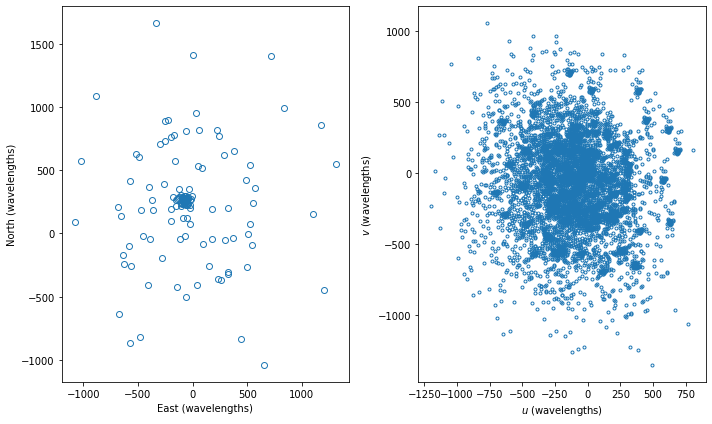

In [10]:
##read in coords from a text file

east, north, height = np.loadtxt('WODEN_array_layout.txt', unpack=True)

##Uh go for 150MHz? Wavelength of about 2m

mwa_us, mwa_vs, mwa_ws = enh2uvw(east/2, north/2, height/2, _)
    
fig, axs = plt.subplots(1,2, figsize=(10,6))

axs[0].plot(east, north, 'C0o', mfc='none')

axs[1].plot(mwa_us, mwa_vs, 'C0.', mfc='none')

axs[0].set_xlabel('East (wavelengths)')
axs[0].set_ylabel('North (wavelengths)')

axs[1].set_xlabel('$u$ (wavelengths)')
axs[1].set_ylabel('$v$ (wavelengths)')

plt.tight_layout()
plt.show()

In [11]:
%%time

number_gains = 5
num_iterations = 20

do_cal = True

if do_cal:
    all_results = np.empty((number_gains*len(ls)*len(ms), NUM_ANTENNAS, 3), dtype=complex)

    for gain_num in range(number_gains):
        print(f'Doing gain set {gain_num}---------------------------------')

        gains = make_gains()

        for l_ind, l in enumerate(ls):
            for m_ind, m in enumerate(ms):
    #             print(f'Doing coord {l:.1f},{m:.1f}')

                result = gain_num*len(ls)*len(ms) + l_ind*len(ms) + m_ind

                ##Find n based on l,m
                n = np.sqrt(1 - l*l - m*m)

                true_visis, true_gains, true_model, err_visis, err_model, u_lengths = simple_simulate(mwa_us, mwa_vs, mwa_ws, l, m, n, gains)

                recover_true_gains = get_gain(data=true_visis, model=true_model, num_iterations=num_iterations)
                recover_error_gains = get_gain(data=true_visis, model=err_model, num_iterations=num_iterations)

                results = np.empty((len(true_gains), 3), dtype=complex)

                results[:,0] = true_gains
                results[:,1] = recover_true_gains
                results[:,2] = recover_error_gains

                all_results[result] = results

    np.savez_compressed("notebook_MWA_gain_errors.npz", results=all_results)

Doing gain set 0---------------------------------
Doing gain set 1---------------------------------
Doing gain set 2---------------------------------
Doing gain set 3---------------------------------
Doing gain set 4---------------------------------
CPU times: user 1d 8h 54min 48s, sys: 3h 17min 27s, total: 1d 12h 12min 16s
Wall time: 2h 29min 29s


5


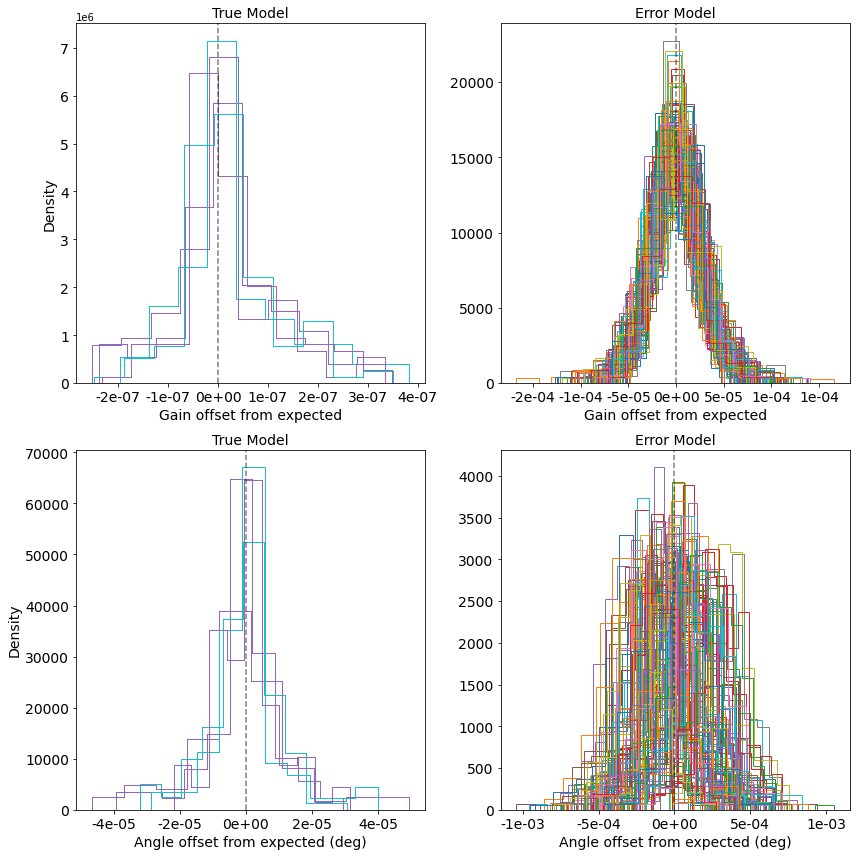

In [12]:
##Load up the calibration results
results = np.load("notebook_MWA_gain_errors.npz")["results"]

fig, axs = plt.subplots(2,2, figsize=(12, 12))

print(number_models)

##make empty lists and just stick results in because I'm being lazy
all_med_gain_true = []
all_mad_gain_true = []
all_med_gain_error = []
all_mad_gain_error = []

all_med_phase_true = []
all_mad_phase_true = []
all_med_phase_error = []
all_mad_phase_error = []

## For each calibration run, plot some histograms and collect some stats
for result in range(number_gains*len(ls)*len(ms)):
# for result in range(5):

    med_gain_true, mad_gain_true, med_gain_error, mad_gain_error, med_phase_true, mad_phase_true, med_phase_error, mad_phase_error = plot_gain_results(results[result, :, :], axs)

    all_med_gain_true.append(med_gain_true)
    all_mad_gain_true.append(mad_gain_true)
    all_med_gain_error.append(med_gain_error)
    all_mad_gain_error.append(mad_gain_error)
    
    all_med_phase_true.append(med_phase_true)
    all_mad_phase_true.append(mad_phase_true)
    all_med_phase_error.append(med_phase_error)
    all_mad_phase_error.append(mad_phase_error)
    
for ax in axs.flatten():
    ax.tick_params(axis='both', labelsize=fontsize)
#     ax.ticklabel_format(useOffset=False)

    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))
    
axs[0,0].set_title("True Model", fontsize=fontsize)
axs[0,1].set_title("Error Model", fontsize=fontsize)

axs[1,0].set_title("True Model", fontsize=fontsize)
axs[1,1].set_title("Error Model", fontsize=fontsize)

axs[0,0].set_ylabel('Density', fontsize=fontsize)
axs[1,0].set_ylabel('Density', fontsize=fontsize)

axs[0,0].set_xlabel('Gain offset from expected', fontsize=fontsize)
axs[0,1].set_xlabel('Gain offset from expected', fontsize=fontsize)

axs[1,0].set_xlabel('Angle offset from expected (deg)', fontsize=fontsize)
axs[1,1].set_xlabel('Angle offset from expected (deg)', fontsize=fontsize)

for ax in axs.flatten():
    ax.axvline(0.0, linestyle='--',alpha=0.5, color='k')

plt.tight_layout()
# fig.savefig('hist_gain-phase_error_from_cal_test.png',bbox_inches='tight')
plt.show()

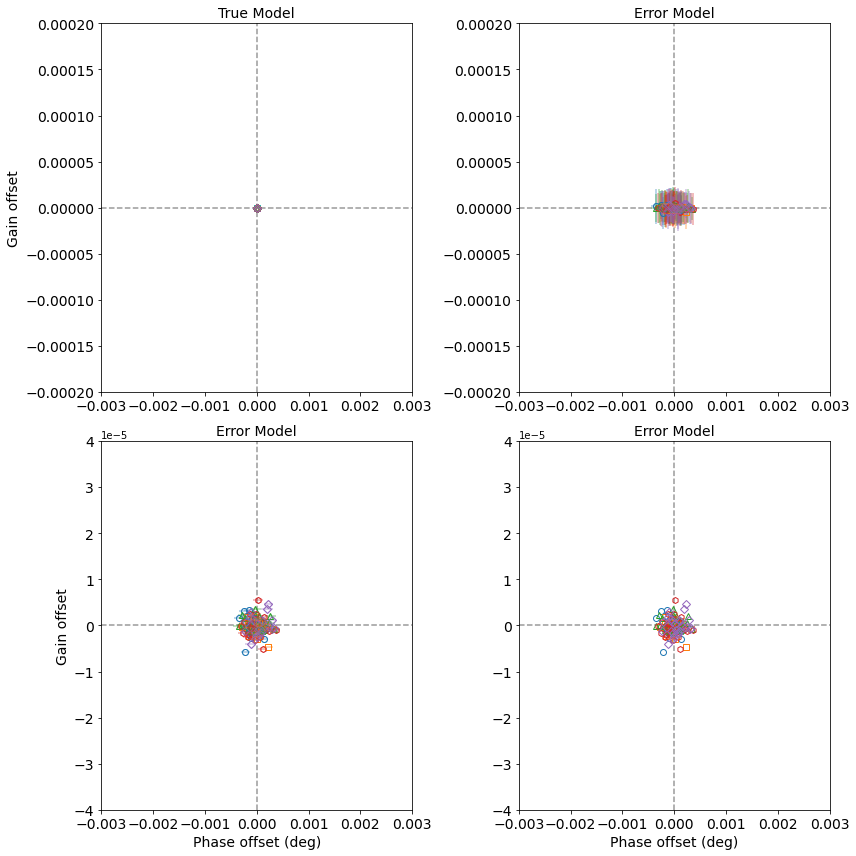

Median magnitude of median phase offset: 1.1e-04 +/- 6.7e-05
Median magnitude of median gain offset: 9.6e-07 +/- 5.5e-07


In [13]:
fig, axs = plt.subplots(2,2, figsize=(12, 12))

num_coords = len(ls)*len(ms)
markers = ['o', 's', '^', 'h', 'D']

for ind in range(len(all_med_phase_true)):

    m_ind = int(ind // num_coords)

    axs[0,0].errorbar(all_med_phase_true[ind], all_med_gain_true[ind],
                    xerr=all_mad_phase_true[ind], yerr=all_mad_gain_true[ind],
                    marker=markers[m_ind], mfc='none')


    axs[0,1].errorbar(all_med_phase_error[ind], all_med_gain_error[ind],
                    xerr=all_mad_phase_error[ind], yerr=all_mad_gain_error[ind],
                    marker=markers[m_ind], mfc='none',alpha=0.4,
                    mec=f"C{m_ind}", ecolor=f"C{m_ind}")
    axs[0,1].plot(all_med_phase_error[ind], all_med_gain_error[ind],
                    marker=markers[m_ind], mfc='none',
                    color=f"C{m_ind}")

    axs[1,0].errorbar(all_med_phase_error[ind], all_med_gain_error[ind],
                    xerr=all_mad_phase_error[ind],
                    marker=markers[m_ind], mfc='none',alpha=0.4,
                    mec=f"C{m_ind}", ecolor=f"C{m_ind}")
    axs[1,0].plot(all_med_phase_error[ind], all_med_gain_error[ind],
                    marker=markers[m_ind], mfc='none',
                    color=f"C{m_ind}")

    axs[1,1].plot(all_med_phase_error[ind], all_med_gain_error[ind],
                    marker=markers[m_ind], mfc='none',
                    color=f"C{m_ind}")

fontsize = 14
    
axs[0,0].set_ylabel('Gain offset', fontsize=fontsize)
axs[1,0].set_ylabel('Gain offset', fontsize=fontsize)

axs[0,0].set_title('True Model', fontsize=fontsize)
axs[0,1].set_title('Error Model', fontsize=fontsize)
axs[1,0].set_title('Error Model', fontsize=fontsize)
axs[1,1].set_title('Error Model', fontsize=fontsize)

axs[1,0].set_xlabel('Phase offset (deg)', fontsize=fontsize)
axs[1,1].set_xlabel('Phase offset (deg)', fontsize=fontsize)

for ax in axs.flatten():
    ax.set_xlim(-0.003, 0.003)
    ax.set_ylim(-2e-4, 2e-4)

    ax.axvline(0., color='k', linestyle='--', alpha=0.4, zorder=0)
    ax.axhline(0., color='k', linestyle='--', alpha=0.4, zorder=0)
    ax.tick_params(axis='both', labelsize=fontsize)


axs[1,0].set_ylim(-4e-5, 4e-5)
axs[1,1].set_ylim(-4e-5, 4e-5)

plt.tight_layout()
#     fig.savefig("med-mad_error_from_cal_test.png")
plt.show()

print(f"Median magnitude of median phase offset: {np.median(np.abs(all_med_phase_error)):.1e} +/- "
      f"{mad(np.abs(all_med_phase_error)):.1e}")

print(f"Median magnitude of median gain offset: {np.median(np.abs(all_med_gain_error)):.1e} +/- "
      f"{mad(np.abs(all_med_gain_error)):.1e}")

Overall we see the same pattern of phase being biased slightly, but we see an order of magnitude less than the random array layouts - most likely because the MWA has less long baselines.

# Mulitple sources on the sky
So far I've tested calibrating a single direction on the sky. What if we have multiple directions? Do these offsets somewhat cancel each other out?

In [14]:
%%time

number_gains = 100
num_iterations = 20

do_cal = True

if do_cal:
    all_results = np.empty((number_gains, NUM_ANTENNAS, 3), dtype=complex)

    for gain_num in range(number_gains):
        print(f'Doing gain set {gain_num}---------------------------------')
        
        sum_visis_true = np.zeros(NUM_BASELINES, dtype=complex)
        sum_model_true = np.zeros(NUM_BASELINES, dtype=complex)
        sum_model_error = np.zeros(NUM_BASELINES, dtype=complex)

        gains = make_gains()

        for l_ind, l in enumerate(ls):
            for m_ind, m in enumerate(ms):
    #             print(f'Doing coord {l:.1f},{m:.1f}')

                result = gain_num*len(ls)*len(ms) + l_ind*len(ms) + m_ind

                ##Find n based on l,m
                n = np.sqrt(1 - l*l - m*m)

                true_visis, true_gains, true_model, err_visis, err_model, u_lengths = simple_simulate(mwa_us, mwa_vs, mwa_ws, l, m, n, gains)
                
                sum_visis_true += true_visis
                sum_model_true += true_model
                sum_model_error += err_model

        recover_true_gains = get_gain(data=sum_visis_true, model=sum_model_true, num_iterations=num_iterations)
        recover_error_gains = get_gain(data=sum_visis_true, model=sum_model_error, num_iterations=num_iterations)

        results = np.empty((len(gains), 3), dtype=complex)

        results[:,0] = gains
        results[:,1] = recover_true_gains
        results[:,2] = recover_error_gains

        all_results[gain_num] = results

    np.savez_compressed("notebook_MWA_multi-comp_gain_errors.npz", results=all_results)

Doing gain set 0---------------------------------
Doing gain set 1---------------------------------
Doing gain set 2---------------------------------
Doing gain set 3---------------------------------
Doing gain set 4---------------------------------
Doing gain set 5---------------------------------
Doing gain set 6---------------------------------
Doing gain set 7---------------------------------
Doing gain set 8---------------------------------
Doing gain set 9---------------------------------
Doing gain set 10---------------------------------
Doing gain set 11---------------------------------
Doing gain set 12---------------------------------
Doing gain set 13---------------------------------
Doing gain set 14---------------------------------
Doing gain set 15---------------------------------
Doing gain set 16---------------------------------
Doing gain set 17---------------------------------
Doing gain set 18---------------------------------
Doing gain set 19------------------------

5


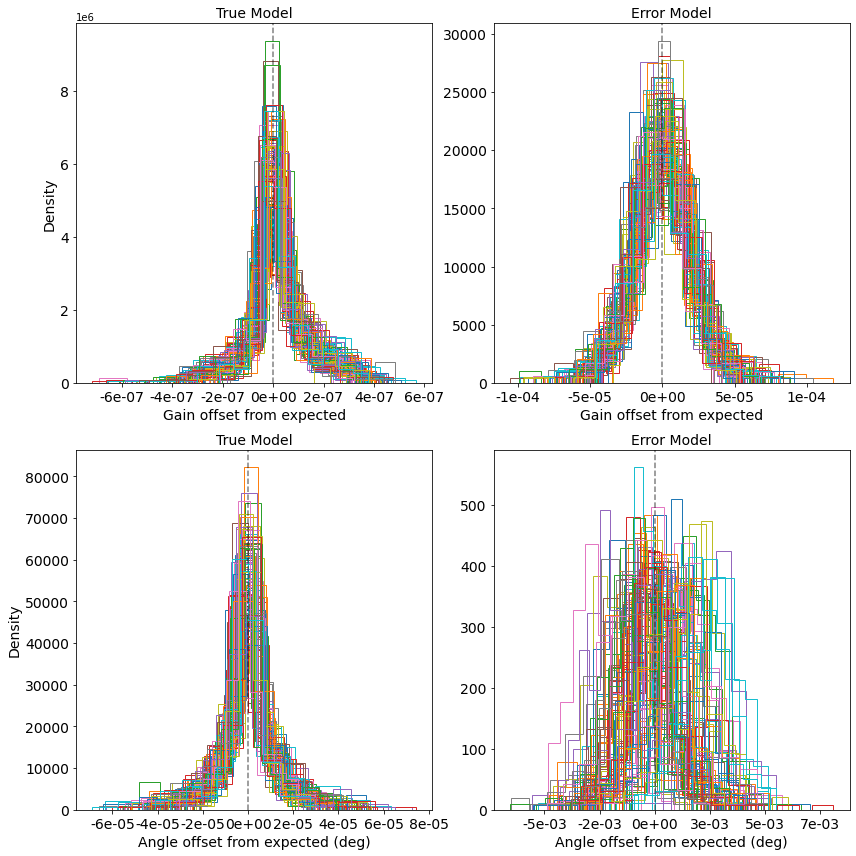

In [15]:
##Load up the calibration results
results = np.load("notebook_MWA_multi-comp_gain_errors.npz")["results"]

fig, axs = plt.subplots(2,2, figsize=(12, 12))

print(number_models)

##make empty lists and just stick results in because I'm being lazy
all_med_gain_true = []
all_mad_gain_true = []
all_med_gain_error = []
all_mad_gain_error = []

all_med_phase_true = []
all_mad_phase_true = []
all_med_phase_error = []
all_mad_phase_error = []

## For each calibration run, plot some histograms and collect some stats
for result in range(number_gains):
# for result in range(5):

    med_gain_true, mad_gain_true, med_gain_error, mad_gain_error, med_phase_true, mad_phase_true, med_phase_error, mad_phase_error = plot_gain_results(results[result, :, :], axs)

    all_med_gain_true.append(med_gain_true)
    all_mad_gain_true.append(mad_gain_true)
    all_med_gain_error.append(med_gain_error)
    all_mad_gain_error.append(mad_gain_error)
    
    all_med_phase_true.append(med_phase_true)
    all_mad_phase_true.append(mad_phase_true)
    all_med_phase_error.append(med_phase_error)
    all_mad_phase_error.append(mad_phase_error)
    
for ax in axs.flatten():
    ax.tick_params(axis='both', labelsize=fontsize)
#     ax.ticklabel_format(useOffset=False)

    ax.xaxis.set_major_formatter(ticker.FormatStrFormatter('%.0e'))
    
axs[0,0].set_title("True Model", fontsize=fontsize)
axs[0,1].set_title("Error Model", fontsize=fontsize)

axs[1,0].set_title("True Model", fontsize=fontsize)
axs[1,1].set_title("Error Model", fontsize=fontsize)

axs[0,0].set_ylabel('Density', fontsize=fontsize)
axs[1,0].set_ylabel('Density', fontsize=fontsize)

axs[0,0].set_xlabel('Gain offset from expected', fontsize=fontsize)
axs[0,1].set_xlabel('Gain offset from expected', fontsize=fontsize)

axs[1,0].set_xlabel('Angle offset from expected (deg)', fontsize=fontsize)
axs[1,1].set_xlabel('Angle offset from expected (deg)', fontsize=fontsize)

for ax in axs.flatten():
    ax.axvline(0.0, linestyle='--',alpha=0.5, color='k')

plt.tight_layout()
# fig.savefig('hist_gain-phase_error_from_cal_test.png',bbox_inches='tight')
plt.show()

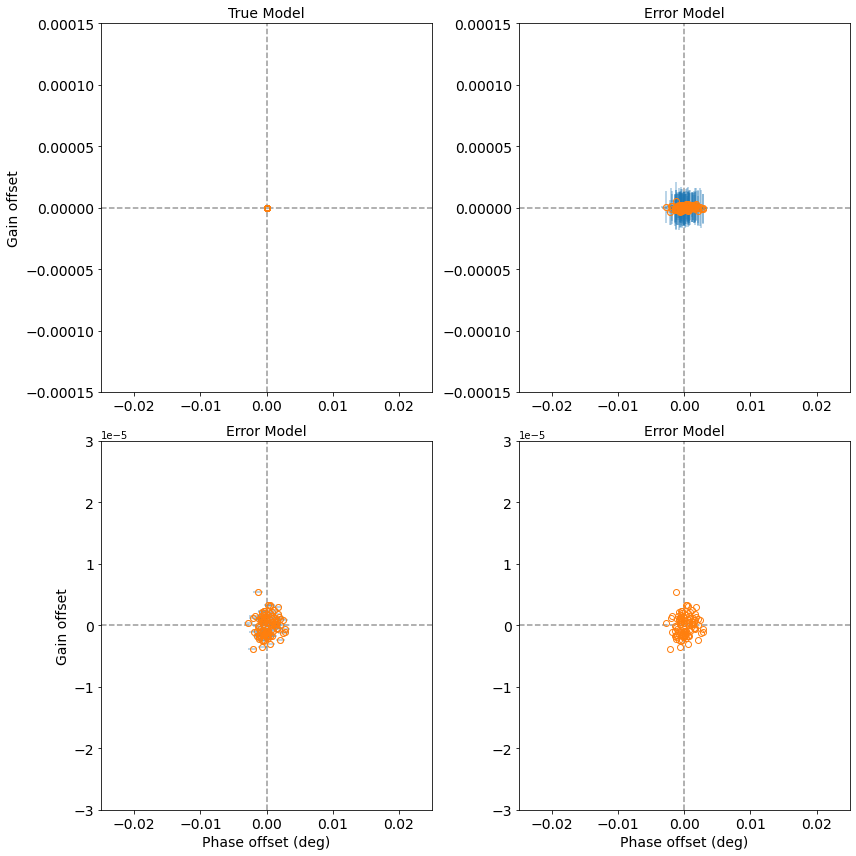

Median magnitude of median phase offset: 7.0e-04 +/- 4.8e-04
Median magnitude of median gain offset: 1.2e-06 +/- 5.6e-07


In [16]:
fig, axs = plt.subplots(2,2, figsize=(12, 12))

# num_coords = len(ls)*len(ms)
# markers = ['o', 's', '^', 'h', 'D']

marker = 'o'

colour1 = 'C0'
colour2 = 'C1'

for ind in range(len(all_med_phase_true)):

    m_ind = int(ind // num_coords)

    axs[0,0].errorbar(all_med_phase_true[ind], all_med_gain_true[ind],
                    xerr=all_mad_phase_true[ind], yerr=all_mad_gain_true[ind],
                    marker=marker, mfc='none',alpha=0.4,
                    ecolor=colour1, mec=colour2)
    axs[0,0].plot(all_med_phase_true[ind], all_med_gain_true[ind],
                    marker=marker, mfc='none',
                    color=colour2)


    axs[0,1].errorbar(all_med_phase_error[ind], all_med_gain_error[ind],
                    xerr=all_mad_phase_error[ind], yerr=all_mad_gain_error[ind],
                    marker=marker, mfc='none',alpha=0.4,
                    ecolor=colour1, mec=colour2)
    axs[0,1].plot(all_med_phase_error[ind], all_med_gain_error[ind],
                    marker=marker, mfc='none',
                    color=colour2)

    axs[1,0].errorbar(all_med_phase_error[ind], all_med_gain_error[ind],
                    xerr=all_mad_phase_error[ind],
                    marker=marker, mfc='none',alpha=0.4,
                    ecolor=colour1, mec=colour2)
    axs[1,0].plot(all_med_phase_error[ind], all_med_gain_error[ind],
                    marker=marker, mfc='none',
                    color=colour2)

    axs[1,1].plot(all_med_phase_error[ind], all_med_gain_error[ind],
                    marker=marker, mfc='none',
                    color=colour2)

fontsize = 14
    
axs[0,0].set_ylabel('Gain offset', fontsize=fontsize)
axs[1,0].set_ylabel('Gain offset', fontsize=fontsize)

axs[0,0].set_title('True Model', fontsize=fontsize)
axs[0,1].set_title('Error Model', fontsize=fontsize)
axs[1,0].set_title('Error Model', fontsize=fontsize)
axs[1,1].set_title('Error Model', fontsize=fontsize)

axs[1,0].set_xlabel('Phase offset (deg)', fontsize=fontsize)
axs[1,1].set_xlabel('Phase offset (deg)', fontsize=fontsize)

for ax in axs.flatten():

    ax.set_xlim(-0.025, 0.025)
    ax.set_ylim(-1.5e-4, 1.5e-4)

    ax.axvline(0., color='k', linestyle='--', alpha=0.4, zorder=0)
    ax.axhline(0., color='k', linestyle='--', alpha=0.4, zorder=0)
    ax.tick_params(axis='both', labelsize=fontsize)

axs[1,0].set_ylim(-3e-5, 3e-5)
axs[1,1].set_ylim(-3e-5, 3e-5)

plt.tight_layout()
#     fig.savefig("med-mad_error_from_cal_test.png")
plt.show()

print(f"Median magnitude of median phase offset: {np.median(np.abs(all_med_phase_error)):.1e} +/- "
      f"{mad(np.abs(all_med_phase_error)):.1e}")
print(f"Median magnitude of median gain offset: {np.median(np.abs(all_med_gain_error)):.1e} +/- "
      f"{mad(np.abs(all_med_gain_error)):.1e}")

It actually looks like the errors compound on one another and increase the overall error on the phase estimation of the gains

# Just the measurement equation alone
If we test just the measurement equation function in `WODEN` rather that a full `woden` executable run, we get the following accuracy.

Num pos offsets 77
Num neg offsets 33
Max difference in real 1.8e-08
Max difference in imag 1.8e-08


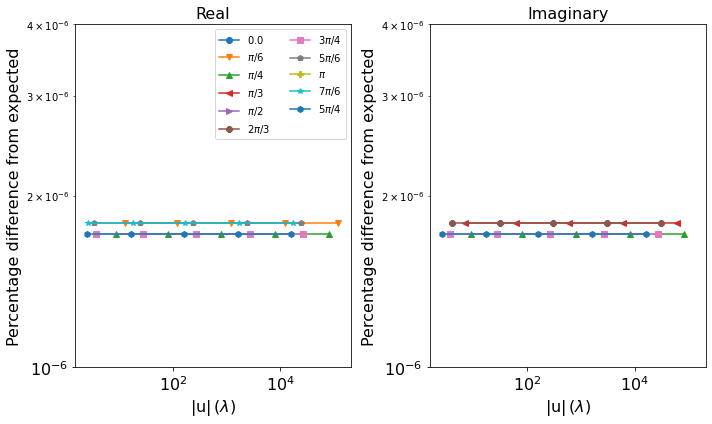

In [17]:
data = np.loadtxt('../../build/cmake_testing/source_components/measurement_eq_outcomes_double.txt')

##Known sin outputs for input phi_simples
known_sine_angles = [0.0, 0.5, np.sqrt(2)/2, np.sqrt(3)/2, 1.0, np.sqrt(3)/2, np.sqrt(2)/2, 0.5, 0.0,
                     -0.5, -np.sqrt(2)/2]

##Known sin outputs for input phi_simples
known_cosine_angles = [1.0, np.sqrt(3)/2, np.sqrt(2)/2, 0.5, 0.0,
                       -0.5, -np.sqrt(2)/2, -np.sqrt(3)/2, -1.0, -np.sqrt(3)/2, -np.sqrt(2)/2]

known_angles_strings = ["$0.0$", "$\pi/6$", "$\pi/4$", "$\pi/3$",
                        "$\pi/2$", "$2\pi/3$", "$3\pi/4$", "$5\pi/6$",
                        "$\pi$",  "$7\pi/6$", "$5\pi/4$"]

num_baselines = 5
num_angles = len(known_sine_angles)

fig, axs  = plt.subplots(1,2, figsize=(10,6))


markers = ["o", "v", "^", "<", ">", "8",
           "s", "p", "P", "*", "h", "H", "+"]

all_re_diffs = np.empty(num_baselines*num_angles)
all_im_diffs = np.empty(num_baselines*num_angles)

num_neg = []
num_pos = []

for angle_ind, known_angle in enumerate(known_angles_strings):

    slice_low = angle_ind*num_baselines
    slice_high = (angle_ind + 1)*num_baselines

    u_lens = data[slice_low:slice_high, 0]
#     expec_re = data[slice_low, 1]
    calc_re = data[slice_low:slice_high, 2]
#     expec_im = data[slice_low, 3]
    calc_im = data[slice_low:slice_high, 4]

#     u_lens = np.sqrt(3*u_lens**2)
    
    expec_im = known_sine_angles[angle_ind]
    expec_re = known_cosine_angles[angle_ind]
    
    if expec_re == 0:
        expec_re_div = 1.0
    else:
        expec_re_div = expec_re
        
    if expec_im == 0:
        expec_im_div = 1.0
    else:
        expec_im_div = expec_im

    abs_diff_re = np.abs((expec_re - calc_re) / expec_re_div)*100.0
    abs_diff_im = np.abs((expec_im - calc_im) / expec_im_div)*100.0


    for diff in expec_re - calc_re:
        if diff < 0:
            num_neg.append(diff)
        else:
            num_pos.append(diff)

    for diff in expec_im - calc_im:
        if diff < 0:
            num_neg.append(diff)
        else:
            num_pos.append(diff)

    all_re_diffs[slice_low:slice_high] = abs_diff_re
    all_im_diffs[slice_low:slice_high] = abs_diff_im

    axs[0].plot(u_lens, abs_diff_re, color=f'C{angle_ind}',
                marker=markers[angle_ind], label=known_angle)
    axs[1].plot(u_lens, abs_diff_im, color=f'C{angle_ind}',
                marker=markers[angle_ind], label=known_angle)

#     expec_comp = expec_re + 1j*expec_im
#     calc_comp = calc_re + 1j*calc_im

#     abs_diff_percent = np.abs(1 - np.abs(calc_comp))*100

#     phase_expec = np.angle(expec_comp)
#     phase_calc = np.angle(calc_comp)

#     phase_diff = phase_expec - phase_calc
#     phase_diff[phase_diff > np.pi] -= 2*np.pi

#     axs[1,0].plot(u_lens, abs_diff_percent, color=f'C{angle_ind}',
#                 marker=markers[angle_ind], label=known_angle)
#     axs[1,1].plot(u_lens, phase_diff*(180.0/np.pi), color=f'C{angle_ind}',
#                 marker=markers[angle_ind], label=known_angle)

    # print(np.abs(expec_comp))

print(f"Num pos offsets {len(num_pos)}")
print(f"Num neg offsets {len(num_neg)}")

print(f"Max difference in real {all_re_diffs.max()/100:.1e}")
print(f"Max difference in imag {all_re_diffs.max()/100:.1e}")

fontsize = 16

for ax in axs.flatten():

    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.tick_params(axis='both', labelsize=fontsize)

axs[0].legend(ncol=2)


axs[0].set_xlabel('$|\mathrm{u}| \,(\lambda)$', fontsize=fontsize)
axs[1].set_xlabel('$|\mathrm{u}| \,(\lambda)$', fontsize=fontsize)

axs[0].set_ylabel('Percentage difference from expected', fontsize=fontsize)
axs[1].set_ylabel('Percentage difference from expected', fontsize=fontsize)

axs[0].set_title("Real", fontsize=fontsize)
axs[1].set_title("Imaginary", fontsize=fontsize)

for ax in axs: ax.set_ylim(1e-6, 4e-6)

plt.tight_layout()
plt.show()



Real intercept -6.68839 slope 0.12269
Imag intercept -7.49154 slope 0.26107


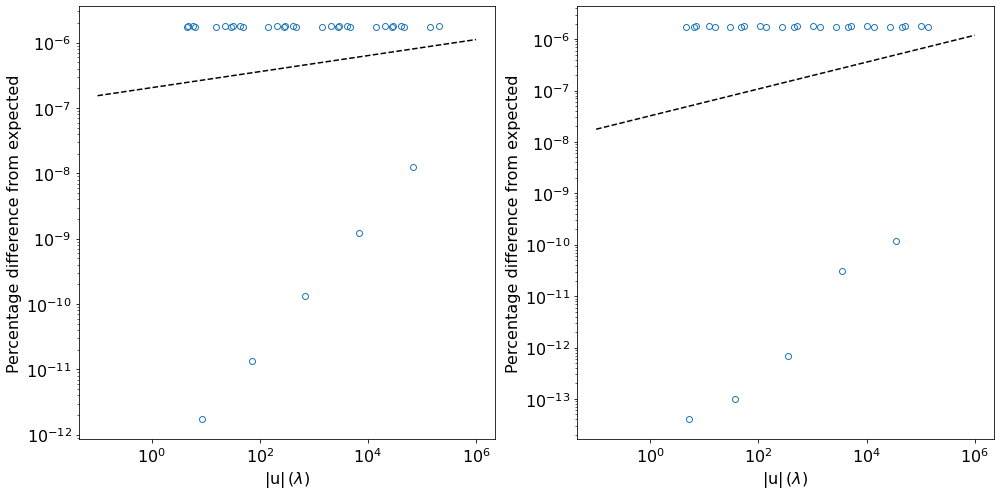

In [18]:
u_lens = np.sqrt(3*data[:,0]**2)

u_range = np.arange(1e-1,1e6)

linear_model = LinearModel(prefix='linear_')
linear_params = linear_model.make_params()

fit_re = linear_model.fit(np.log10(all_re_diffs[all_re_diffs != 0]), 
                          linear_params, x=np.log10(u_lens[all_re_diffs != 0]))
intercept = fit_re.params['linear_intercept'].value
slope = fit_re.params['linear_slope'].value
print(f'Real intercept {intercept:.5f} slope {slope:.5f}')

best_fit_re = 10**(intercept + np.log10(u_range)*slope)


fig, axs  = plt.subplots(1,2, figsize=(14,7))

axs[0].plot(u_lens, all_re_diffs, 'o', mfc='none')
axs[0].plot(u_range, best_fit_re, 'k--')


fit_im = linear_model.fit(np.log10(all_im_diffs[all_im_diffs != 0]), 
                         linear_params, x=np.log10(u_lens[all_im_diffs != 0]))
intercept = fit_im.params['linear_intercept'].value
slope = fit_im.params['linear_slope'].value
print(f'Imag intercept {intercept:.5f} slope {slope:.5f}')

best_fit_im = 10**(intercept + np.log10(u_range)*slope)

axs[1].plot(u_lens, all_im_diffs, 'o', mfc='none')
axs[1].plot(u_range, best_fit_im, 'k--')

for ax in axs:
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.set_xlabel('$|\mathrm{u}| \,(\lambda)$', fontsize=fontsize)
    ax.set_ylabel('Percentage difference from expected', fontsize=fontsize)
    
    ax.tick_params(axis='both', labelsize=fontsize)


plt.tight_layout()
# fig.savefig('measure_eq_results.png',bbox_inches='tight')
plt.show()